In [223]:
import pandas as pd 
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import sklearn.preprocessing as preproc

In [225]:
# Read in csv file
df = pd.read_excel("for CA3-IEA-EV-dataEV salesHistoricalCars 3.xlsx", skiprows=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      3798 non-null   object 
 1   category    3798 non-null   object 
 2   parameter   3798 non-null   object 
 3   mode        3798 non-null   object 
 4   powertrain  3798 non-null   object 
 5   year        3798 non-null   int64  
 6   unit        3798 non-null   object 
 7   value       3798 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 237.5+ KB


In [227]:
df.head()


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [229]:
df.describe()

,year,value
count,3798.000000,3.798000e+03
mean,2017.369932,1.009542e+05
std,3.809226,8.184402e+05
min,2010.000000,1.500000e-05
25%,2014.000000,2.300000e+00
50%,2018.000000,1.900000e+02
75%,2021.000000,6.800000e+03
max,2023.000000,2.800000e+07


In [231]:
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [233]:
missing_value_formats = ['none','no','n.a.','???','NA','n/a', 'na', '--', 'nan', 'NaN']
df = pd.read_excel("for CA3-IEA-EV-dataEV salesHistoricalCars 3.xlsx", skiprows=1)

In [235]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows:', duplicate_rows_df.shape)


number of duplicate rows: (0, 8)


In [237]:
df.dropna(inplace=True) 

In [239]:
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [241]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Correct method name is fit_transform (not fit_transfrom). Let's try from column "Region". 
df['region'] = le.fit_transform(df['region'])
df['category']= le.fit_transform(df['category'])
df['parameter']= le.fit_transform(df['parameter'])
df['mode']= le.fit_transform(df['mode'])
df['powertrain']= le.fit_transform(df['powertrain'])
df['unit']= le.fit_transform(df['unit'])

In [243]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,0,0,0,0,0,2011,3,49.00000
1,0,0,3,0,1,2011,4,0.00039
2,0,0,1,0,1,2011,4,0.00650
3,0,0,2,0,0,2011,3,49.00000
4,0,0,2,0,0,2012,3,220.00000


Text(0.5, 1.0, 'value')

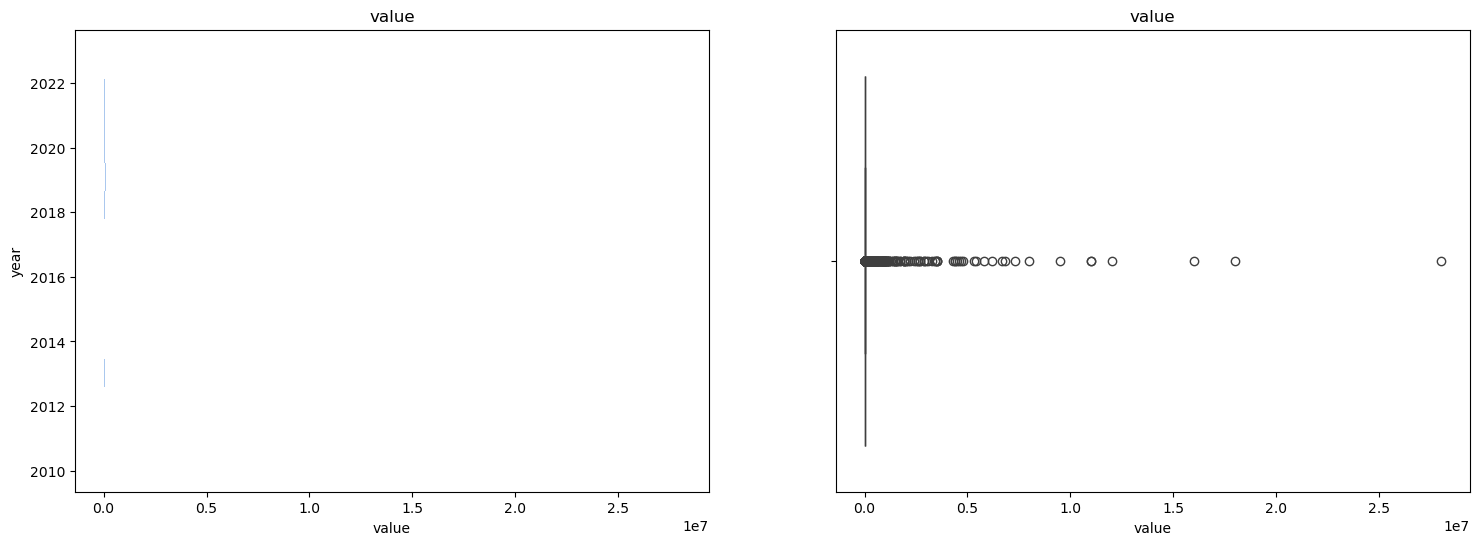

In [257]:
# To check the distirubution in value features in order to delete outliers 

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.histplot(x='value',y='year', data=df, kde=True)
plt.title("value")

plt.subplot(1,2,2)
sns.boxplot(x='value', data = df)
plt.title("value")

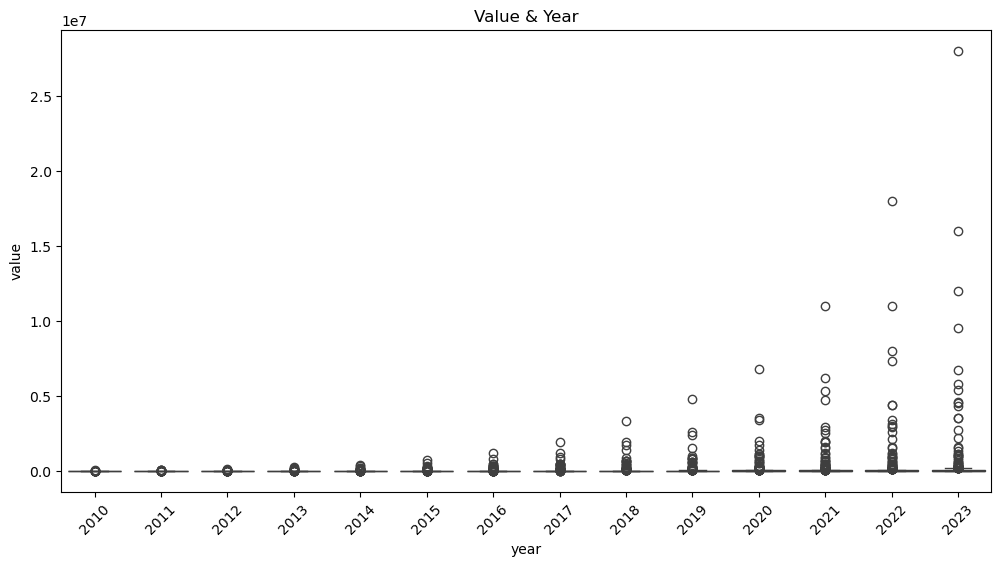

In [259]:
import seaborn as sns

# Plotting a box plot for value to year
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='value', data=df)
plt.title('Value & Year')
plt.xlabel('year')
plt.ylabel('value')
plt.xticks(rotation=45)
plt.show()

In [261]:
from sklearn import preprocessing 
df_scaled=preprocessing.scale(df)
df_scaled= pd.DataFrame(df_scaled, columns= df.columns)

In [263]:
df_scaled

,region,category,parameter,mode,powertrain,year,unit,value
0,-1.684933,0.0,-1.019761,0.0,-1.178133,-1.672458,-0.210725,-0.123306
1,-1.684933,0.0,1.088213,0.0,-0.292259,-1.672458,1.143478,-0.123366
2,-1.684933,0.0,-0.317103,0.0,-0.292259,-1.672458,1.143478,-0.123366
3,-1.684933,0.0,0.385555,0.0,-1.178133,-1.672458,-0.210725,-0.123306
4,-1.684933,0.0,0.385555,0.0,-1.178133,-1.409903,-0.210725,-0.123097
...,...,...,...,...,...,...,...,...
3793,1.606329,0.0,0.385555,0.0,-1.178133,1.478203,-0.210725,34.092555
3794,1.606329,0.0,-1.019761,0.0,-1.178133,1.478203,-0.210725,11.485607
3795,1.606329,0.0,-0.317103,0.0,-0.292259,1.478203,1.143478,-0.123344
3796,1.606329,0.0,1.088213,0.0,-0.292259,1.478203,1.143478,-0.123362


In [265]:
correlation_matrix=df.corr()
print(correlation_matrix)

              region  category  parameter  mode  powertrain      year  \
region      1.000000       NaN   0.050326   NaN   -0.004871 -0.009735   
category         NaN       NaN        NaN   NaN         NaN       NaN   
parameter   0.050326       NaN   1.000000   NaN   -0.099068 -0.086029   
mode             NaN       NaN        NaN   NaN         NaN       NaN   
powertrain -0.004871       NaN  -0.099068   NaN    1.000000  0.074314   
year       -0.009735       NaN  -0.086029   NaN    0.074314  1.000000   
unit       -0.058617       NaN  -0.276521   NaN   -0.061586  0.006401   
value       0.042472       NaN   0.002050   NaN   -0.033740  0.124555   

                unit     value  
region     -0.058617  0.042472  
category         NaN       NaN  
parameter  -0.276521  0.002050  
mode             NaN       NaN  
powertrain -0.061586 -0.033740  
year        0.006401  0.124555  
unit        1.000000 -0.026780  
value      -0.026780  1.000000  


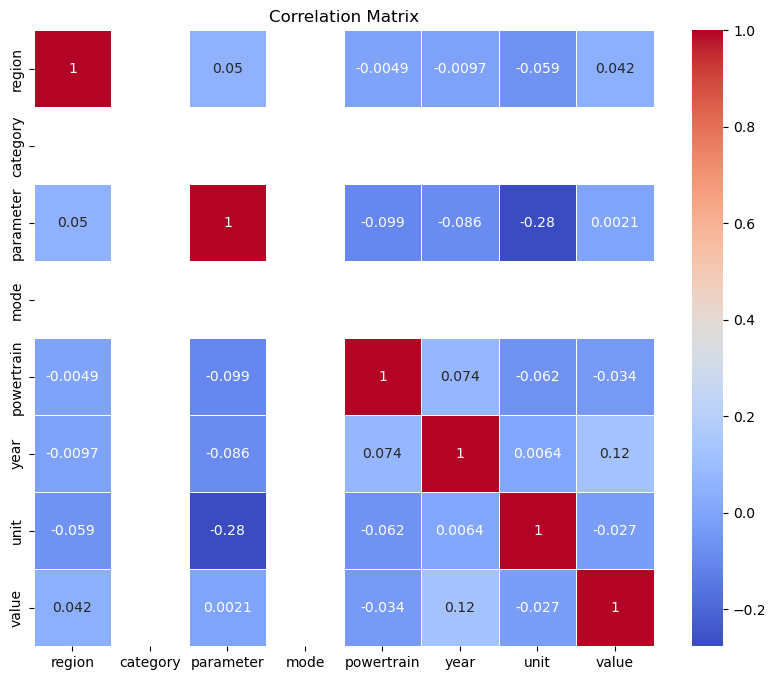

In [267]:
# Assuming df is my DataFrame
correlation_matrix = df.corr()  # Compute the correlation matrix

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

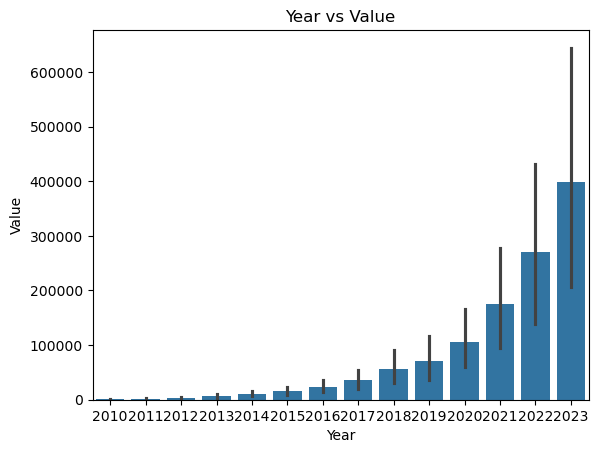

In [269]:
sns.barplot(data=df, x='year', y='value')
plt.title('Year vs Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

In [271]:
# Split the dataset into X and y columns
X = df.iloc[:,:5].values            # Independent variables
y = df.iloc[:, :7].values              # Dependent variable

In [273]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [275]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3798, 5), (3798, 7), (3038, 5), (760, 5), (3038, 7), (760, 7))

In [277]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [279]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean:  0.7251020034927332
STD:  0.004249006195621118




In [281]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print(lr.coef_)

[ 1.17239551e-13  0.00000000e+00  3.33066907e-15  0.00000000e+00
 -4.88498131e-15  2.01743905e+03  3.49840129e+00]
[[ 1.00000000e+00  8.19074396e-19  2.70548897e-15  0.00000000e+00
  -7.76487246e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.08093289e-17 -2.22044605e-16  1.00000000e+00  0.00000000e+00
  -2.77037841e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-1.97713391e-17 -1.94289029e-16  3.89641277e-15  0.00000000e+00
   1.00000000e+00]
 [-8.90239494e-04  0.00000000e+00 -2.38704693e-01  0.00000000e+00
   2.51343893e-01]
 [-2.22112730e-03  2.77555756e-17 -1.36659464e-01  0.00000000e+00
  -6.05286840e-02]]


In [283]:
df=df.drop(columns=['category'])

In [285]:
df.head()

,region,parameter,mode,powertrain,year,unit,value
0,0,0,0,0,2011,3,49.00000
1,0,3,0,1,2011,4,0.00039
2,0,1,0,1,2011,4,0.00650
3,0,2,0,0,2011,3,49.00000
4,0,2,0,0,2012,3,220.00000


In [287]:
df=df.drop(columns=['mode'])

In [289]:
df.head()

,region,parameter,powertrain,year,unit,value
0,0,0,0,2011,3,49.00000
1,0,3,1,2011,4,0.00039
2,0,1,1,2011,4,0.00650
3,0,2,0,2011,3,49.00000
4,0,2,0,2012,3,220.00000


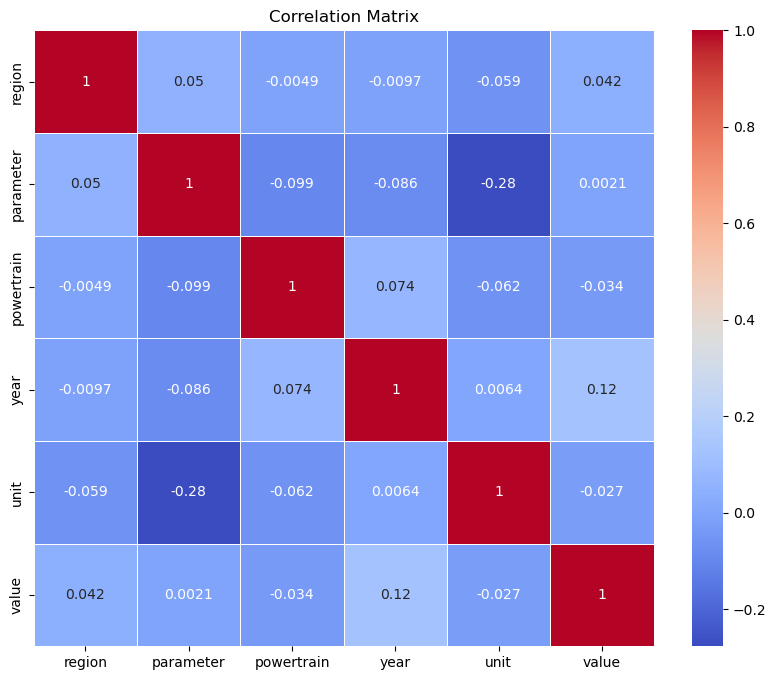

In [291]:
correlation_matrix = df.corr()  # Compute the correlation matrix

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [293]:
# Based on the Heatmap we can see the highest correlation features for this DataSet is Year and Value. 
# In this connection let's follow to this tiw features using LinearRegression method as they are numerical features dataset. 

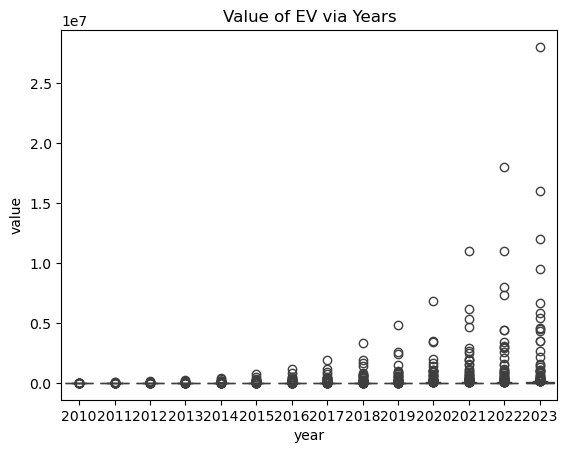

In [295]:
sns.boxplot(x='year', y='value', data=df)
plt.title('Value of EV via Years')
plt.xlabel('year')
plt.ylabel('value')
plt.show()

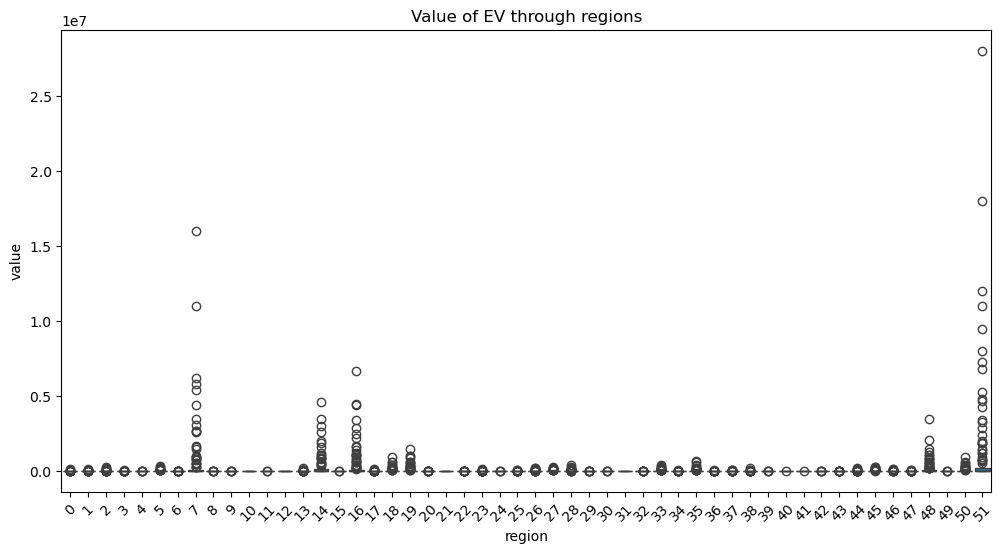

In [297]:
# I'm trying plotting region, parameter, powertrain, year, unit	and value

import seaborn as sns

# Plotting a box plot for Value of EV by Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='value', data=df)
plt.title('Value of EV through regions')
plt.xlabel('region')
plt.ylabel('value')
plt.xticks(rotation=45)
plt.show()

In [309]:
df["value"].max()

28000000.0

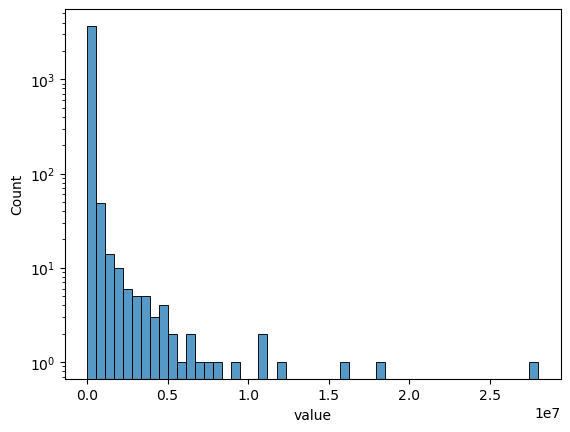

In [313]:
import seaborn as sns 
sns.histplot(df["value"],bins=50)
plt.yscale("log")   
plt.show()